In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# word2vec 실습합니다.

https://wikidocs.net/50739

`gensim` 패키지 안에 word2vec을 지원한다. 해당 패키지를 이용하면 임베딩 벡터로 쉽게 변환시킬 수 있다.

In [2]:
import re
import urllib.request
import zipfile
from lxml import etree
from nltk.tokenize import word_tokenize, sent_tokenize

In [3]:
# 데이터 다운로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x7f077733c7d0>)

## 데이터 불러오기 및 전처리는 복붙하였음.

In [4]:
targetXML = open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)

# xml 파일로부터 <content>와 </content> 사이의 내용만 가져온다.
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter) 등의 배경음 부분을 제거.
# 해당 코드는 괄호로 구성된 내용을 제거.
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화를 수행.
sent_text = sent_tokenize(content_text)

# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환.
normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.
result = [word_tokenize(sentence) for sentence in normalized_text]

print('총 샘플의 개수 : {}'.format(len(result)))


총 샘플의 개수 : 273424


In [5]:
# 샘플 3개만 출력
for line in result[:3]:
    print(line)

['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']


## Word2Vec 훈련

Word2Vec의 하이퍼 파라미터 값
- sentences = data
- vector_size = 워드 벡터의 특징 값. **즉, 임베딩 된 벡터의 차원**.
- window = 컨텍스트 윈도우 크기
- min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)
- workers = 학습을 위한 프로세스 수
- sg = 0은 `CBOW`, 1은 `Skip-gram`.

In [6]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors


model = Word2Vec(sentences=result, vector_size=100, window=5, min_count=5, workers=4, sg=0)

In [7]:
model_result = model.wv.most_similar("python")
model_result

[('monty', 0.9301590323448181),
 ('lothar', 0.8996833562850952),
 ('ram', 0.8909273743629456),
 ('ack', 0.883608877658844),
 ('panda', 0.8800954222679138),
 ('wrestler', 0.8794598579406738),
 ('postpartum', 0.8729462623596191),
 ('merkel', 0.8716883659362793),
 ('jobana', 0.8703738451004028),
 ('ow', 0.8703093528747559)]

## 모델 저장하고 로드하기

In [8]:
model.wv.save_word2vec_format('eng_w2v')
loaded_model = KeyedVectors.load_word2vec_format("eng_w2v")

# 한국어로 만들어볼 것(네이버 영화 리뷰를 이용)

In [9]:
# konlpy, Mecab 형태소 분석기 설치 스크립트 실행
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

--2022-06-24 07:14:26--  https://www.dropbox.com/s/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.18, 2620:100:601f:18::a27d:912
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz [following]
--2022-06-24 07:14:27--  https://www.dropbox.com/s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd52ac5de933cb954935f05ed6b.dl.dropboxusercontent.com/cd/0/get/Bnx_jt97xVZ2nhMB63gBglsq4xDduHnREOSv0gmwJxd1QxIUWqK_0o2P6yD4dGumY_o2WDo6JNfDS7FmMzA4RZ7ekRjDnzldRDScLU8K6C6WmgWTmPVGrusI4SngHnFwCpl4UPGKTnevLobWaUvbphLYR5ikw5CVDKKJZ3LYtgwU0j4wxQ-SmB28COwddMHE1L0/file?dl=1# [following]
--2022-06-24 07:14:27--  https://ucd52ac5de933cb954935f05ed6b.dl.dropboxusercontent.com/cd/0/get/

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [11]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7f0793cf8910>)

In [12]:
train_data = pd.read_table('ratings.txt')
train_data[:5] # 상위 5개 출력

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [13]:
print(len(train_data)) # 리뷰 개수 출력

200000


In [14]:
# NULL 이 존재하는지
train_data.isnull().values.any()

True

In [15]:
train_data.isnull().sum()

id          0
document    8
label       0
dtype: int64

In [16]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [17]:
# 결측값이 제거 된 이후의 개수
print(len(train_data)) # 리뷰 개수 출력

199992


In [18]:
# 정규 표현식을 통한 한글 외 문자 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [19]:
train_data.head()

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


In [20]:
from tqdm import tqdm


# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()

tokenized_data = []
for sentence in tqdm(train_data['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

100%|██████████| 199992/199992 [20:29<00:00, 162.66it/s]


리뷰의 최대 길이 : 72
리뷰의 평균 길이 : 10.716703668146726


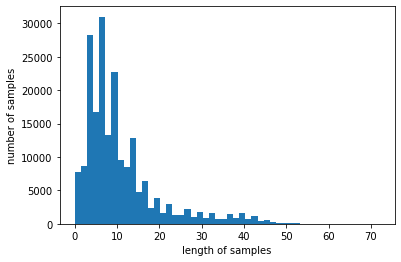

In [21]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(review) for review in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [22]:
k_model = Word2Vec(sentences = tokenized_data, vector_size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(21613, 100)

In [23]:
print(k_model.wv.most_similar("최민식"))
# 최민식이 왜 신인이야

[('안성기', 0.8636301755905151), ('한석규', 0.8582366704940796), ('김수현', 0.8492501378059387), ('설경구', 0.8490222096443176), ('송강호', 0.8462077379226685), ('이정재', 0.8294329643249512), ('김명민', 0.8289309740066528), ('최민수', 0.827400267124176), ('공리', 0.8255091905593872), ('감초', 0.8254725337028503)]
